# MLP + Pre processamento + drop(price > 250)

#   Bibliotecas

In [ ]:
import pandas as pd
import random 
import numpy as np
import re
from scipy.sparse import hstack #utilizada para a junção de matrizes

In [ ]:
#Pré processamento de colunas

from sklearn.model_selection import train_test_split #Divisão do dataset entre treino e teste
from sklearn.feature_extraction.text import TfidfVectorizer #vetorização do dataset
from sklearn.preprocessing import OneHotEncoder #aplicação de dummy

In [ ]:
#Pré processamento de texto


import nltk
from nltk import word_tokenize #tokenizador
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords   #stopword

nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')
nltk.download('stopwords')
nltk.download('wordnet')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#import de funções do arquivo pre_processamento

from pre_processamento import pre_processamento, text_preprocess, textcolumns_junct,stemming

In [ ]:
# Modelo a ser testado

from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
#metricas

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

train = pd.read_csv('/content/drive/MyDrive/Datasets/train.tsv', sep = '\t')
test = pd.read_csv('/content/drive/MyDrive/Datasets/test.tsv', sep = '\t')

Mounted at /content/drive


In [ ]:
train,test = pre_processamento(train,test)

#   Análise estatística

In [ ]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [ ]:
train.head()

,name,item_condition_id,category_name,brand_name,price,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet,27,Men,Tops,T-shirts,6.0,2018.0
1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity,13,Women,Jewelry,Necklaces,5.0,2018.0


In [ ]:
train.describe()

,item_condition_id,price,shipping,stock,datetime_month,datetime_year
count,1.481661e+06,1.481661e+06,1.481661e+06,1.481661e+06,1.474770e+06,1474770.0
mean,1.907322e+00,2.675329e+01,4.473257e-01,1.178550e+01,6.517894e+00,2018.0
std,9.031759e-01,3.859198e+01,4.972178e-01,1.056099e+01,3.194489e+00,0.0
min,1.000000e+00,3.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2018.0
25%,1.000000e+00,1.000000e+01,0.000000e+00,4.000000e+00,4.000000e+00,2018.0
50%,2.000000e+00,1.700000e+01,0.000000e+00,9.000000e+00,7.000000e+00,2018.0
75%,3.000000e+00,2.900000e+01,1.000000e+00,1.700000e+01,9.000000e+00,2018.0
max,5.000000e+00,2.009000e+03,1.000000e+00,9.500000e+01,1.200000e+01,2018.0


In [ ]:
train.isnull().sum()  #necessário valair forma de tratar os valores nulos.

name                      0
item_condition_id         0
category_name          6314
brand_name           632336
price                     0
shipping                  0
item_description          4
stock                     0
gen_cat                   0
sub1_cat                  0
sub2_cat                  0
datetime_month         6891
datetime_year          6891
dtype: int64

In [ ]:
train.duplicated().sum()

0

In [ ]:
train = train.drop(train[~((train['price'] > 0) & (train['price'] < 250))].index)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f87ae17e4d0>,
      dtype=object)

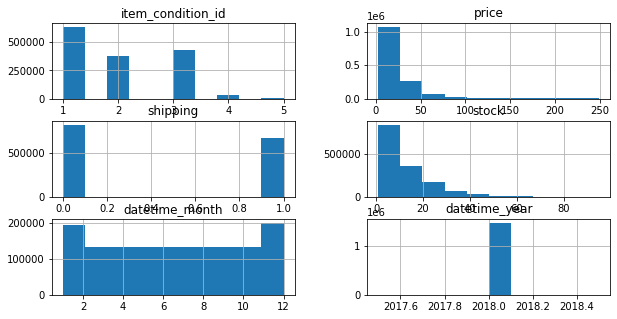

In [ ]:
train.hist(figsize=(10,5))

In [ ]:
X = train.drop("price", axis = 1)
y = train["price"]

In [ ]:
X.shape

(1475215, 12)

#   Pré-processamento 

In [ ]:
X = textcolumns_junct(X)

In [ ]:
#Convertendo tudo para string

X["item_description"] = X["item_description"].astype(str)

In [ ]:
X["item_description"] = X["item_description"].apply(lambda x: text_preprocess(x)) #Limpando texto com regex.


In [ ]:
X["item_description"] = X["item_description"].apply(lambda x: word_tokenize(x)) #tokenizando

In [ ]:
X["item_description"] = X["item_description"].apply(lambda x: stemming(x))

In [ ]:
X["item_description"]=[" ".join(review) for review in X["item_description"].values]

In [ ]:
X.head()

,item_condition_id,category_name,shipping,item_description,stock,gen_cat,sub1_cat,sub2_cat,datetime_month,datetime_year
0,3,Men/Tops/T-shirts,1,mlb cincinnati red shirt size xl descript yet,27,Men,Tops,T-shirts,6.0,2018.0
1,3,Electronics/Computers & Tablets/Components & P...,0,razer blackwidow chroma keyboard razer keyboar...,15,Electronics,Computers & Tablets,Components & Parts,3.0,2018.0
2,1,Women/Tops & Blouses/Blouse,1,ava viv blous target ador top hint lace key ho...,14,Women,Tops & Blouses,Blouse,10.0,2018.0
3,1,Home/Home Décor/Home Décor Accents,1,leather hors statu new tag . leather hors . re...,1,Home,Home Décor,Home Décor Accents,3.0,2018.0
4,1,Women/Jewelry/Necklaces,0,24k gold plate rose complet certif authent,13,Women,Jewelry,Necklaces,5.0,2018.0


In [ ]:
X["item_description"]

0              mlb cincinnati red shirt size xl descript yet
1          razer blackwidow chroma keyboard razer keyboar...
2          ava viv blous target ador top hint lace key ho...
3          leather hors statu new tag . leather hors . re...
4                 24k gold plate rose complet certif authent
                                 ...                        
1482530    free peopl inspir dress free peopl lace say si...
1482531    littl mermaid handmad dress disney littl merma...
1482532    21 day fix contain eat plan use twice still gr...
1482533    world market lantern 2 one see 2 red 2 orang 2...
1482534    brand new lux de vill wallet new tag red spark...
Name: item_description, Length: 1475215, dtype: object

#   Split

In [ ]:
#Separação em treino e teste para começarmos as transformaçõs, protegendo nossos dados de validação de possíveis vazamentos. 

Xtrain, Xval, ytrain, yval = train_test_split(X, y, test_size=0.2, random_state=10) #Divisão em 80/20

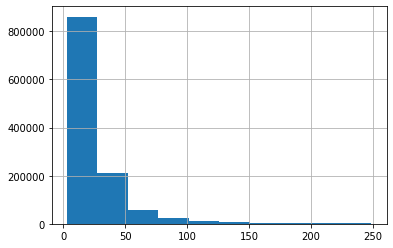

In [ ]:
#Normalizando, com log, o target (price), foi realizado de forma separada para nao terem dados vazados.

ytrain_log =  np.log1p(ytrain)
yval_log =  np.log1p(yval)
ytrain_log.hist()

# Transformadores

In [ ]:
vec = TfidfVectorizer(stop_words='english', ngram_range=(1,2), min_df = 50, max_df = 0.5) #vetorização, com stop word. 

In [ ]:
vec_train = vec.fit_transform(Xtrain["item_description"])

vec_train

<1180172x65722 sparse matrix of type '<class 'numpy.float64'>'
	with 30655766 stored elements in Compressed Sparse Row format>

In [ ]:
vec_val = vec.transform(Xval["item_description"])

vec_val

<295043x65722 sparse matrix of type '<class 'numpy.float64'>'
	with 7659311 stored elements in Compressed Sparse Row format>

In [ ]:
ohe = OneHotEncoder(handle_unknown="ignore")

#aplicação dummy nas colunas categóricas.

ohe_train = ohe.fit_transform(Xtrain[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat",
                                         "datetime_month"]])
                            
ohe_train

<1180172x1010 sparse matrix of type '<class 'numpy.float64'>'
	with 7081032 stored elements in Compressed Sparse Row format>

In [ ]:
ohe_val = ohe.transform(Xval[["item_condition_id",   
                                         "shipping",
                                         "gen_cat",
                                         "sub1_cat",
                                         "sub2_cat", 
                                         "datetime_month"]])

ohe_val

<295043x1010 sparse matrix of type '<class 'numpy.float64'>'
	with 1770251 stored elements in Compressed Sparse Row format>

In [ ]:
#juntando cada matrix gerada por cada pré-processamento

x_train = hstack([
                 (vec_train),
                 (ohe_train)
                 	
                                     ],format='csr') 
x_train

<1180172x66732 sparse matrix of type '<class 'numpy.float64'>'
	with 37736798 stored elements in Compressed Sparse Row format>

In [ ]:
x_val = hstack([
                 (vec_val),
                 (ohe_val),
                             ], format='csr') 
x_val

<295043x66732 sparse matrix of type '<class 'numpy.float64'>'
	with 9429562 stored elements in Compressed Sparse Row format>

# Modelo

In [ ]:
from tensorflow.keras.backend import clear_session

clear_session()

In [ ]:
from keras.layers import Input, Dense, Reshape, Conv1D, BatchNormalization, Activation, Flatten, AveragePooling1D, MaxPooling1D
from keras.models import Model

input = Input(shape=(x_train.shape[-1]), sparse=True, name='sparse')
dense3 = Dense(1024, activation="relu") (input)
dense4 = Dense(512, activation="relu") (dense3)
dense5 = Dense(256, activation="relu") (dense4)
out = Dense(1) (dense5)

model = Model(inputs = input, outputs = out)

model.summary()

#Tentar dropar os bundles

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sparse (InputLayer)         [(None, 66732)]           0         
                                                                 
 dense (Dense)               (None, 1024)              68334592  
                                                                 
 dense_1 (Dense)             (None, 512)               524800    
                                                                 
 dense_2 (Dense)             (None, 256)               131328    
                                                                 
 dense_3 (Dense)             (None, 1)                 257       
                                                                 
Total params: 68,990,977
Trainable params: 68,990,977
Non-trainable params: 0
_________________________________________________________________


In [ ]:
ytrain.values.shape

(1180172,)

In [ ]:
from tensorflow.keras.metrics import RootMeanSquaredError

model.compile(loss="mean_squared_error", metrics=['mean_squared_error', 'mean_squared_logarithmic_error', RootMeanSquaredError()], optimizer = 'adam')
history1 = model.fit(x_train, ytrain_log.values, batch_size=2048, epochs=10, verbose=True)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 1024), dtype=float32), dense_shape=Tensor("gradient_tape/model/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


577/577 [==============================] - 41s 65ms/step - loss: 0.3105 - mean_squared_error: 0.3105 - mean_squared_logarithmic_error: 0.0260 - root_mean_squared_error: 0.5573
Epoch 2/10
577/577 [==============================] - 39s 62ms/step - loss: 0.1745 - mean_squared_error: 0.1745 - mean_squared_logarithmic_error: 0.0112 - root_mean_squared_error: 0.4178
Epoch 3/10
577/577 [==============================] - 38s 62ms/step - loss: 0.1263 - mean_squared_error: 0.1263 - mean_squared_logarithmic_error: 0.0082 - root_mean_squared_error: 0.3553
Epoch 4/10
577/577 [==============================] - 38s 62ms/step - loss: 0.0817 - mean_squared_error: 0.0817 - mean_squared_logarithmic_error: 0.0054 - root_mean_squared_error: 0.2858
Epoch 5/10
577/577 [==============================] - 39s 63ms/step - loss: 0.0540 - mean_squared_error: 0.0540 - mean_squared_logarithmic_error: 0.0036 - root_mean_squared_error: 0.2324
Epoch 6/10
577/577 [==============================] - 39s 62ms/step - loss: 

In [ ]:
print("\n")
scoreMLP = model.evaluate(x_val, yval_log.values)
print(model.metrics_names)
print("mse: ", scoreMLP[1])
print("msle: ", scoreMLP[2])
print("rmse: ", scoreMLP[3])



9221/9221 [==============================] - 33s 4ms/step - loss: 0.2180 - mean_squared_error: 0.2180 - mean_squared_logarithmic_error: 0.0140 - root_mean_squared_error: 0.4669
['loss', 'mean_squared_error', 'mean_squared_logarithmic_error', 'root_mean_squared_error']
mse:  0.2180166095495224
msle:  0.013966496102511883
rmse:  0.46692249178886414


In [ ]:
import math
from sklearn.metrics import mean_squared_error, mean_squared_log_error, mean_absolute_error

In [ ]:
y_pred = [math.exp(i)-1 for i in model.predict(x_val)]

print(mean_absolute_error(yval,y_pred))
print(mean_squared_error(yval,y_pred))
print(mean_squared_log_error(yval,y_pred))

9.491644347321527
335.2774882191335
0.21801625922406964


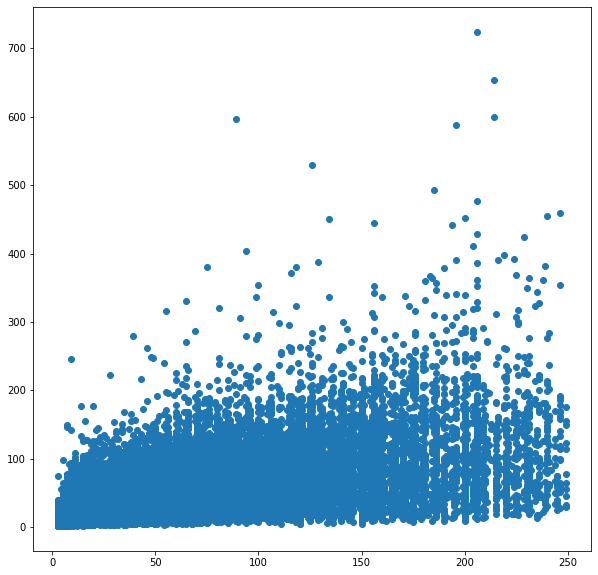

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.scatter(x=yval, y=y_pred)